# Frequentist vs Bayesian Inference: A Simulation Study

In this notebook, we'll compare the **Frequentist** and **Bayesian** approaches to inference using a simple simulation study.

We'll generate data from a known distribution in order to:

1. Apply Frequentist methods to estimate the mean, test a hypothesis, and construct a confidence interval.
2. Use Bayesian methods with two different priors to compute the posterior distribution and credible intervals.

You may change the sample size and other parameters to explore the differences/similarities between the Frequentists and Bayesian methods.

### 1. Data Generation


We simulate $n = 100$ observations from a normal distribution with true parameters $\mu = 2$ and  $\sigma = 1$.



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set seed for reproducibility
np.random.seed(42)

# Parameters
mu_true = 2
sigma_true = 1
n = 100

# Generate data
x = np.random.normal(loc=mu_true, scale=sigma_true, size=n)

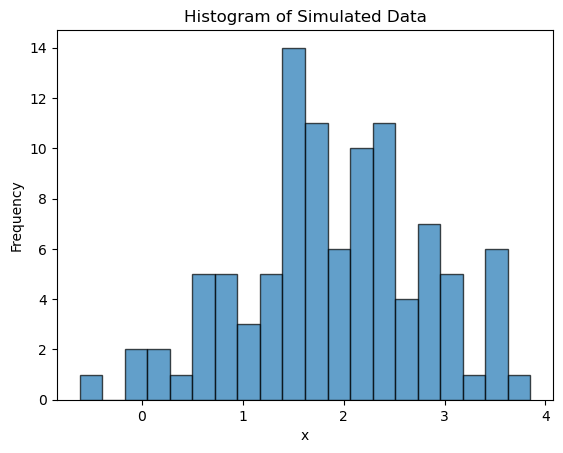

In [6]:
# Optional: Plot the histogram of the generated data

plt.hist(x, bins=20, edgecolor='k', alpha=0.7)
plt.title("Histogram of Simulated Data")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.show()

### 2. Frequentist Analysis


We now perform a frequentist analysis on the simulated data.

1. Estimate the sample mean.
2. Perform a one-sample z-test for $H_0: \mu = 0$ v.s. $H_a: \mu \neq 0 $, assuming known variance $\sigma^2 = 1$.
3. Construct a $95\%$ confidence interval for $\mu$.


In [8]:
from scipy.stats import norm

# Step 1: Estimate sample mean
sample_mean = np.mean(x)

# Step 2: z-test with known sigma
z_stat = (sample_mean - 0) / (sigma_true / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Step 3: 95% confidence interval
ci_lower = sample_mean - norm.ppf(0.975) * sigma_true / np.sqrt(n)
ci_upper = sample_mean + norm.ppf(0.975) * sigma_true / np.sqrt(n)

print(f"Sample mean: {sample_mean:.3f}")
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"95% Confidence Interval for mu: ({ci_lower:.3f}, {ci_upper:.3f})")


Sample mean: 1.896
Z-statistic: 18.962
P-value: 0.0000
95% Confidence Interval for mu: (1.700, 2.092)


### 3. Bayesian Analysis


Given that the variance $\sigma^2 = 1$ is known, the conjugate prior for the mean $\mu$ is a normal distribution
$$\mu \sim N(\mu_0, 	\tau_0^2).$$

We can show that, given data $ x_1, \ldots, x_n \sim N(\mu, \sigma^2)$, the posterior distribution is:
$$\mu \mid x \sim N\left( \mu_n, 	\tau_n^2 \right)$$
where 
$$\tau_n^2 = \left( \frac{n}{\sigma^2} + \frac{1}{	\tau_0^2} 
\right)^{-1}, \quad
\mu_n = 	\tau_n^2 \left(\frac{n {\rm var}{(x)}}{\sigma^2} + \frac{\mu_0}{	\tau_0^2}  \right)$$
We consider two priors:
- Weak prior: $\mu_0 = 0, 	\tau_0^2 = 10 $
- Strong prior: $ \mu_0 = 0, 	\tau_0^2 = 2$.

**Note**: Because the posterior is also normal, the maximum a posteriori (MAP) estimators are the posteior means. 

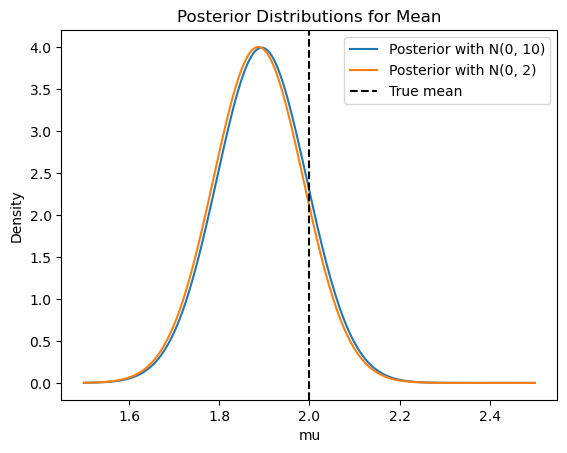

Posterior mean (N(0,10)): 1.894, 95% credible interval: (1.698, 2.090)
Posterior mean (N(0,2)):  1.887, 95% credible interval: (1.691, 2.082)


In [9]:

# Posterior calculation function
def compute_posterior(mu0, tau0_sq, xbar, n, sigma_sq):
    tau_n_sq = 1 / (n / sigma_sq + 1 / tau0_sq)
    mu_n = tau_n_sq * (n * xbar / sigma_sq + mu0 / tau0_sq)
    return mu_n, np.sqrt(tau_n_sq)

# Prior 1: N(0, 10)
mu1, std1 = compute_posterior(mu0=0, tau0_sq=10, xbar=sample_mean, n=n, sigma_sq=sigma_true**2)
# Prior 2: N(0, 2)
mu2, std2 = compute_posterior(mu0=0, tau0_sq=2, xbar=sample_mean, n=n, sigma_sq=sigma_true**2)

# Plot posteriors
x_vals = np.linspace(1.5, 2.5, 200)
plt.plot(x_vals, stats.norm.pdf(x_vals, mu1, std1), label='Posterior with N(0, 10)')
plt.plot(x_vals, stats.norm.pdf(x_vals, mu2, std2), label='Posterior with N(0, 2)')
plt.axvline(mu_true, color='k', linestyle='--', label='True mean')
plt.title("Posterior Distributions for Mean")
plt.xlabel("mu")
plt.ylabel("Density")
plt.legend()
plt.show()

# Credible intervals
ci1 = (mu1 - 1.96 * std1, mu1 + 1.96 * std1)
ci2 = (mu2 - 1.96 * std2, mu2 + 1.96 * std2)

print(f"Posterior mean (N(0,10)): {mu1:.3f}, 95% credible interval: ({ci1[0]:.3f}, {ci1[1]:.3f})")
print(f"Posterior mean (N(0,2)):  {mu2:.3f}, 95% credible interval: ({ci2[0]:.3f}, {ci2[1]:.3f})")
